# Text Detect and Read


### Reference:

1. https://www.opcito.com/blogs/extracting-text-from-images-with-tesseract-ocr-opencv-and-python
2. https://stackoverflow.com/questions/50951955/pytesseract-tesseractnotfound-error-tesseract-is-not-installed-or-its-not-i

In [1]:
# install pesseract for windowa as explained at the following link
# https://stackoverflow.com/questions/50951955/pytesseract-tesseractnotfound-error-tesseract-is-not-installed-or-its-not-i
# https://www.youtube.com/watch?v=4uWp6dS6_G4&list=PL2VXyKi-KpYuTAZz__9KVl1jQz74bDG7i&index=5

In [2]:
# importing modules
import cv2
import pytesseract
from matplotlib import pyplot as plt
from pytesseract import Output

from pdf2image import convert_from_path

In [3]:
pages = convert_from_path('scan-to-pdf-04.pdf')

In [4]:
print(len(pages))

for count, page in enumerate(pages):
    page.save(f'scan-to-pdf-04{count}.jpg', 'JPEG')

1


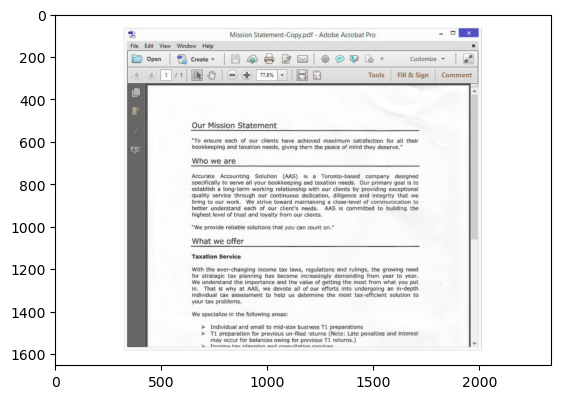

In [5]:
# reading image using opencv
# image = cv2.imread('scenetext06.jpg')
image = cv2.imread('scan-to-pdf-040.jpg')
plt.imshow(image)

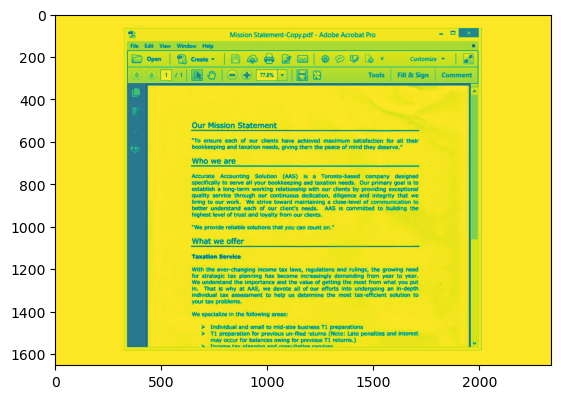

In [6]:
#converting image into gray scale image
gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
plt.imshow(gray_image)

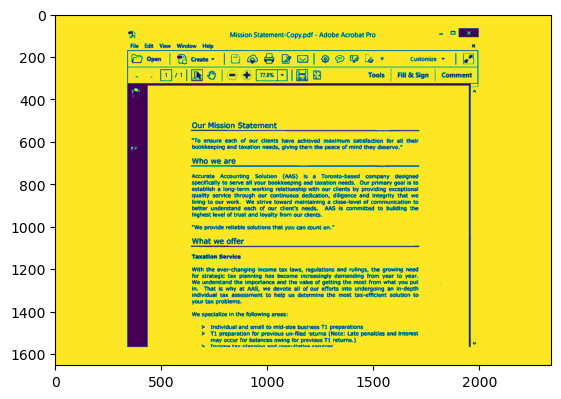

In [7]:
# converting it to binary image by Thresholding
# this step is required if you have colored image because if you skip this part
# then tesseract won't able to detect text correctly and this will give incorrect result
threshold_img = cv2.threshold(gray_image, 0, 255, cv2.THRESH_BINARY | cv2.THRESH_OTSU)[1]
plt.imshow(threshold_img)

In [8]:
# set the path
# path is at C:\Users\basharm\AppData\Local\Programs\Tesseract-OCR
pytesseract.pytesseract.tesseract_cmd = r'C:\Users\basharm\AppData\Local\Programs\Tesseract-OCR\tesseract.exe'

#configuring parameters for tesseract
custom_config = r'--oem 3 --psm 6'

# now feeding image to tesseract
details = pytesseract.image_to_data(threshold_img, output_type=Output.DICT, config=custom_config, lang='eng')

print(details.keys())

dict_keys(['level', 'page_num', 'block_num', 'par_num', 'line_num', 'word_num', 'left', 'top', 'width', 'height', 'conf', 'text'])


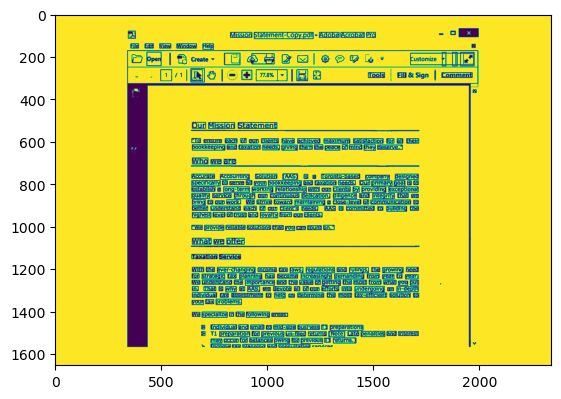

In [9]:
total_boxes = len(details['text'])
for sequence_number in range(total_boxes):
    if int(details['conf'][sequence_number]) >30:
        (x, y, w, h) = (details['left'][sequence_number], details['top'][sequence_number], details['width'][sequence_number],  details['height'][sequence_number])
        threshold_img = cv2.rectangle(threshold_img, (x, y), (x + w, y + h), (0, 255, 0), 2)

plt.imshow(threshold_img)

In [10]:
parse_text = []
word_list = []
last_word = ''
for word in details['text']:
    if word!='':
        word_list.append(word)
        last_word = word
    if (last_word!='' and word == '') or (word==details['text'][-1]):
        parse_text.append(word_list)
        word_list = []

In [11]:
parse_text

[['6',
  'Mission',
  'Statement-Copy.pdf',
  '-',
  'Adobe',
  'Acrobat',
  'Pro',
  '-',
  'a'],
 ['File', 'Edit', 'View', 'Window', 'Help', '*'],
 ['FE',
  'open',
  '|',
  'fice',
  '|F',
  'OS',
  'BWM|S®eoPls-',
  'customize',
  '~',
  '|',
  '|e”)'],
 [],
 ['.',
  '1',
  '|',
  '(De)',
  '&',
  '|',
  'oe',
  '[772%]',
  '~]',
  '|',
  '5',
  'Tools',
  'Fill',
  '&',
  'Sign',
  '|',
  'Comment'],
 ['=', 'A'],
 ['Our', 'Mission', 'Statement'],
 ['"To',
  'ensure',
  'each',
  'of',
  'our',
  'clients',
  'have',
  'achizved',
  'maximum',
  'satisfaction',
  'for',
  'all',
  'their'],
 ['aa',
  'bookkeeping',
  'and',
  'taxation',
  'needs,',
  'giving',
  'then',
  'the',
  'peace',
  'of',
  'mind',
  'they',
  'deserve.”'],
 ['Who', 'we', 'are'],
 ['Accurate',
  'Accounting',
  'Solution',
  '(AAS)',
  'is',
  'a',
  'Toronto-based',
  'company',
  'designed'],
 ['specifically',
  'to',
  'serve',
  'all',
  'your',
  'bookkeeping',
  'and',
  'taxation',
  'needs.',
  'O

In [12]:
import csv

with open('scan-to-pdf-04.txt',  'w', newline="") as file:
          csv.writer(file, delimiter=" ").writerows(parse_text)